In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(y_train_set[0])
print(x_train_set[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

9


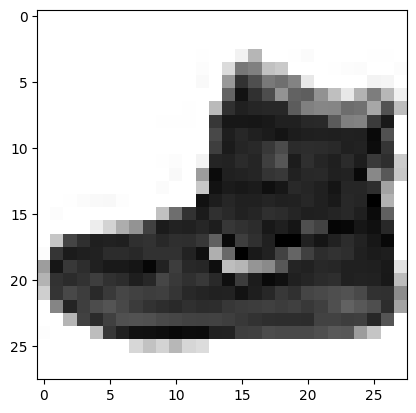

In [4]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [5]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set,
                                                      y_train_set,
                                                      random_state=1)

In [7]:
x_train.shape, x_valid.shape

((45000, 28, 28), (15000, 28, 28))

In [9]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

[[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
   10   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0 113 226 247 216 185 147 146 207 235
  210 136  15   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255 255 223
  218 235 223 172   0   0   4   0   0   0]
 [  0   0   0   2   0   0 205 239 215 212 214 206 213 216 220 220 216 213
  218 214 212 239 213   0   0   0   0   0]
 [  0   0   0   0   0 163 236 208 215 216 217 215 215 215 209 212 215 215
  215 219 218 206 234 100   0   0   0   0]
 [  0   0   0   0  47 234 215 215 215 215 214 214 215 214 215 216 216 215
  215 215 217 215 223 232   0   0   0   0]
 [  0   0   0   0 189 231 222 214 214 215 215 215 215 215 214 215 216 216
  216 218 217 218 219 238  78   0   0   0]
 [  0   0   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216
  217 218 217 221 225 230 194   0   0   0]
 [  0   0   0 130 235 209 225 233 211 214 216 216 217 216 214 21

In [11]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [15]:
# Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
keras.backend.clear_session()
np. random. seed (1)
tf.random.set_seed(1)

In [17]:
model = Sequential([
    #輸入層：將 28*28攤平成一維度
    Flatten(input_shape=x_train.shape[1:]),
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')
])

C:\Users\ELSA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
!python --version

Python 3.12.4


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile
model. compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics= ['accuracy'])

In [23]:
# Train
train = model.fit(x_train, y_train,
                   epochs=20,
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.6213 - loss: 1.1799 - val_accuracy: 0.7782 - val_loss: 0.6782
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7935 - loss: 0.6498 - val_accuracy: 0.8067 - val_loss: 0.5962
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8110 - loss: 0.5776 - val_accuracy: 0.8131 - val_loss: 0.5589
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.8228 - loss: 0.5405 - val_accuracy: 0.8230 - val_loss: 0.5301
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8276 - loss: 0.5244 - val_accuracy: 0.8276 - val_loss: 0.5209
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.8326 - loss: 0.4985 - val_accuracy: 0.8271 - val_loss: 0.5097
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8345 - loss: 0.4989 - val_accuracy: 0.8341 - val_loss: 0.4913
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8386 -

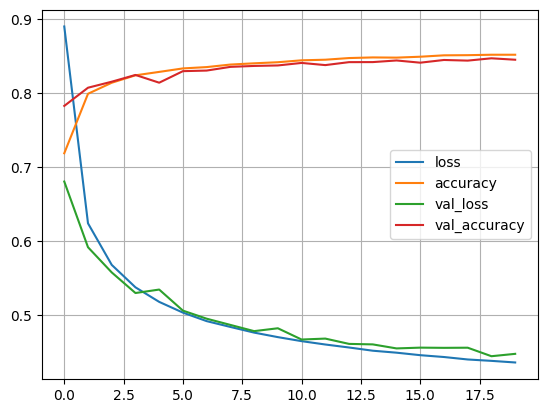

In [18]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt. show()

In [19]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.8321


[0.47783568501472473, 0.832099974155426]

In [23]:
# Predict
y_proba = model.predict(x_test)
y_proba[10:13].round (2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.02, 0.24, 0.  , 0.65, 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.09, 0.03, 0.16],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.6 , 0.  , 0.11, 0.28, 0.  ]],
      dtype=float32)

In [24]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[10:13]# 預測結果

array([4, 5, 5])

In [25]:
y_test[10:13]

array([4, 5, 7], dtype=uint8)

In [26]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[762   5  12  60   4   1 138   0  18   0]
 [  1 956   3  27   5   0   6   0   2   0]
 [ 16   5 670  10 143   1 141   0  14   0]
 [ 20  14  11 867  27   1  55   0   5   0]
 [  0   2  85  45 738   1 119   0  10   0]
 [  1   0   0   2   0 901   0  58   5  33]
 [114   3  99  39  89   1 622   0  33   0]
 [  0   0   0   0   0  36   0 933   0  31]
 [  0   1   4  11   2   4  29   7 942   0]
 [  0   0   0   0   0  14   1  53   2 930]]
